In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bmark.utils.config import load_config
from bmark.utils.dataset import get_kfold_ind
sns.set()
sc.settings.n_jobs = 32

In [3]:
paths = load_config()
ad = sc.read_h5ad(paths['pilot']['data_dir']/'consolidated.h5ad')
ad.obs.loc[ad.obs["class_label"] == "Non-Neural", "class_label"] = "Non-Neuronal"
ad.obs["class_label"].cat.remove_unused_categories(inplace=True)
ad.layers["UMIs"] = ad.X.copy()
ad

/scratch/fast/3689862/ipykernel_224992/1603843621.py:4: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  ad.obs["class_label"].cat.remove_unused_categories(inplace=True)


AnnData object with n_obs × n_vars = 40026 × 31053
    obs: 'cluster_id', 'cluster_label', 'cluster_color', 'subclass_id', 'subclass_label', 'subclass_color', 'class_id', 'class_label', 'class_color', 'genes_detected', 'size', 'total_reads', 'umi_counts', 'mtx_rowsums'
    var: 'gene_id'
    layers: 'UMIs'

In [4]:
tmp = pd.read_csv("/allen/programs/celltypes/workgroups/mousecelltypes/benchmarking/dat/results/mlp_nsforest.csv", index_col=0)
tmp = tmp.loc[ad.obs_names,:]
ad.obs = pd.concat([ad.obs, tmp], axis=1)
ad.obs["correct_0"] = ad.obs["cluster_label"] == ad.obs["cluster_label_0"]

tmp = pd.read_csv("/allen/programs/celltypes/workgroups/mousecelltypes/benchmarking/dat/results/mlp_scANVI.csv", index_col=0)
tmp = tmp.loc[ad.obs_names,:]
tmp.drop(["fold"], axis=1, inplace=True)
ad.obs = pd.concat([ad.obs, tmp], axis=1)
ad.obs["correct_scANVI"] = ad.obs["cluster_label"] == ad.obs["cluster_label_scANVI"]

(0.0, 1.0)

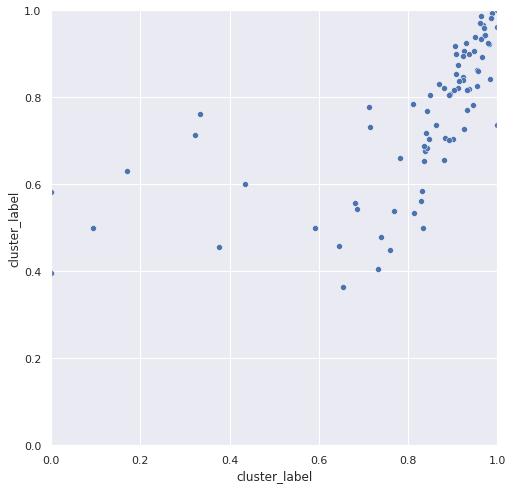

In [5]:
plt.rcParams["figure.figsize"] = (8,8)

ax = sns.scatterplot(x=ad.obs.loc[ad.obs.correct_scANVI == True, "cluster_label"].value_counts(sort=False) / ad.obs.loc[:, "cluster_label"].value_counts(sort=False), y=ad.obs.loc[ad.obs.correct_0 == True, "cluster_label"].value_counts(sort=False) / ad.obs.loc[:, "cluster_label"].value_counts(sort=False))
ax.set_xlim(0,1)
ax.set_ylim(0,1)

(0.0, 1.0)

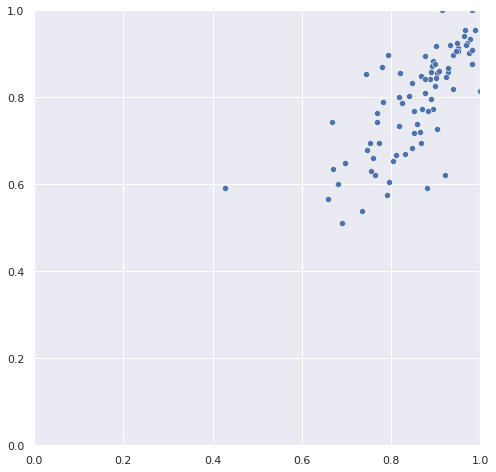

In [6]:
plt.rcParams["figure.figsize"] = (8,8)

ax = sns.scatterplot(x=ad.obs.loc[ad.obs.correct_scANVI == True, "cluster_label"].value_counts(sort=False) / ad.obs.loc[:, "cluster_label_scANVI"].value_counts(sort=False), y=ad.obs.loc[ad.obs.correct_0 == True, "cluster_label"].value_counts(sort=False) / ad.obs.loc[:, "cluster_label_0"].value_counts(sort=False))
ax.set_xlim(0,1)
ax.set_ylim(0,1)

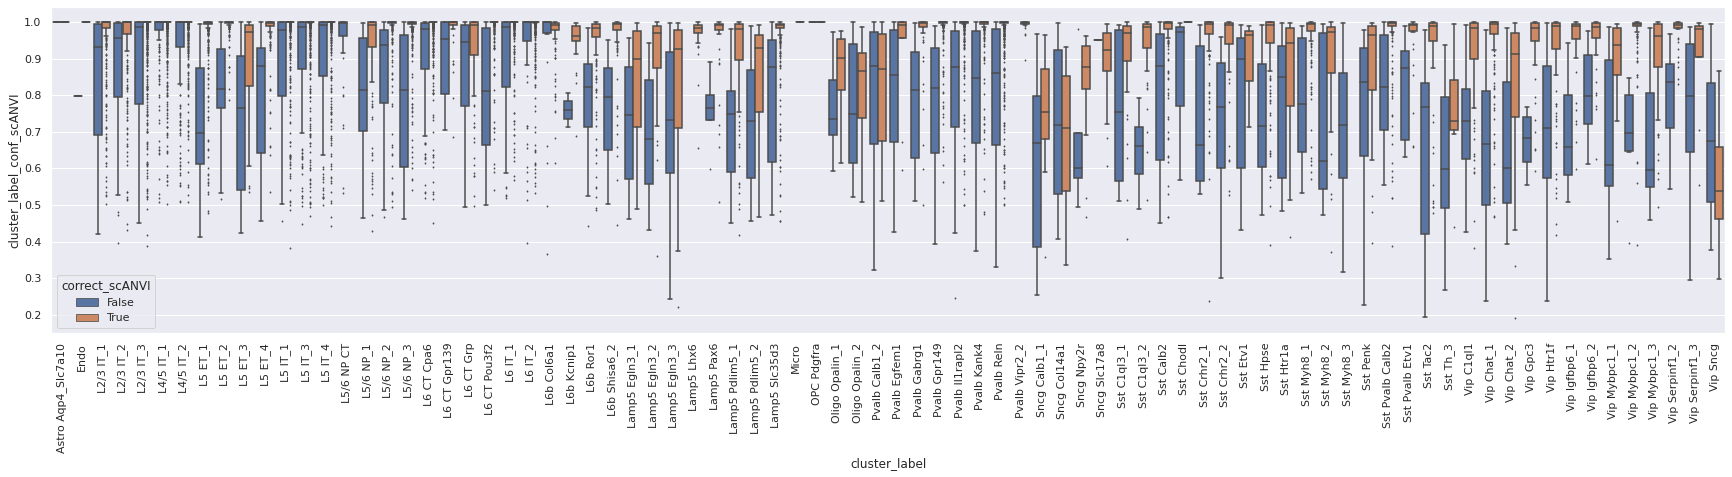

In [8]:
plt.rcParams["figure.figsize"] = (30,6)
ax = sns.boxplot(data=ad.obs, x="cluster_label", y="cluster_label_conf_scANVI", hue="correct_scANVI", fliersize=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

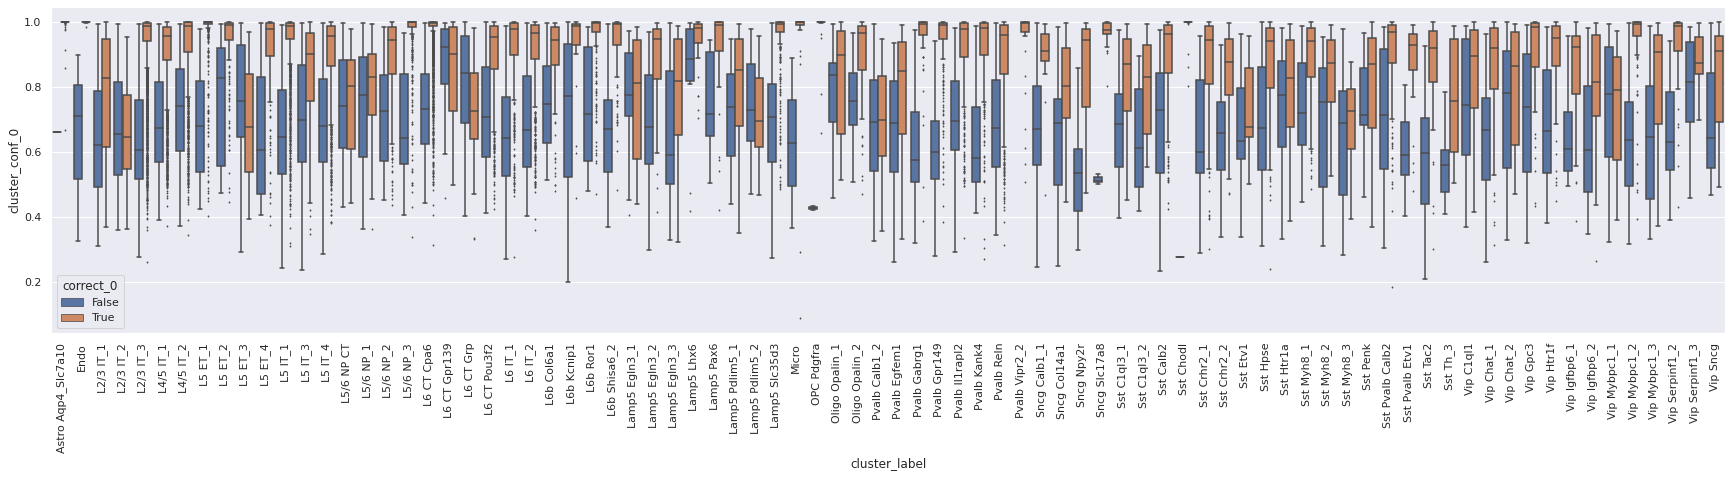

In [9]:
plt.rcParams["figure.figsize"] = (30,6)
ax = sns.boxplot(data=ad.obs, x="cluster_label", y="cluster_conf_0", hue="correct_0", fliersize=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);